<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ricardo Rodriguez, Doris Gomez, Carlos Ruiz.

**Fecha:** 17 de septiembre del 2020.

**Expediente** : IF722544, IF707135, IF713897.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 3: Clase 6


# Github en el cual realizamos el trabajo
https://github.com/Rickyrguez98/Tarea4_CRuiz_RRodriguez.git

>### <font color ='red'> **Tarea 4** 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

<ipython-input-1-1f925ff5918b>:16: RuntimeWarning: divide by zero encountered in true_divide
  f= lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))


None


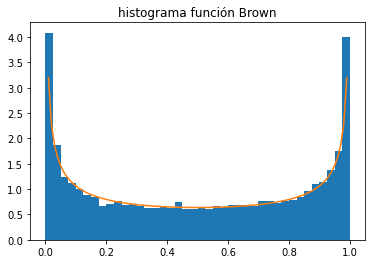

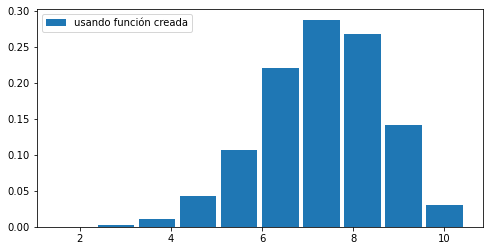

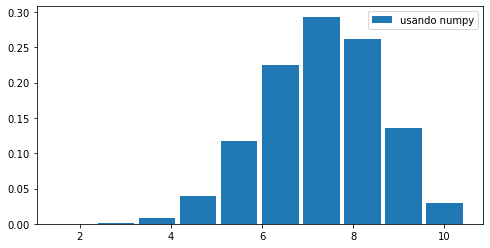

In [1]:
#solucion Ricky
# Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt

# Creamos la función que crea muestras distribuidas exponencialmente
def Browniano(f,Finv,N):
    u= np.random.uniform(0,1,N)
    f_rand= Finv(u)
    x= np.arange(0,1,0.01)
    f_dens= f(x)
    plt.hist(f_rand,bins=40,density= True)
    plt.plot(x,f_dens)
    plt.show
    plt.title('histograma función Brown')
f= lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
Finv= lambda u: np.sin(np.pi*u/2)**2
N=10000                

print(Browniano(f,Finv,N))


def distribucion_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v


def histograma(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
  #     print(len(y),len(x))
    plt.legend()
    plt.show()  
    
# Función que calcula la probabilidad acumulada optimizada
def Binomial(n,p):
    Proba = np.zeros(n)
    Proba[0] = (1-p)**n
    def proba(i):
        nonlocal Proba
        c  = p/(1-p)
        Proba[i+1]=(c*(n-i)/(i+1))*Proba[i]
        
    # Lleno el vector Pr usando compresión de listas
    [proba(i) for i in range(n-1)]
    return np.cumsum(Proba)

# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

proba_acum = Binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
binomial_distribution = distribucion_discreta(u,proba_acum)
histograma(binomial_distribution,'usando función creada')

# Usando numpy
binomial_np = np.random.binomial(n,p,N)
histograma(binomial_np,'usando numpy')

<ipython-input-9-f2c94507e07d>:15: RuntimeWarning: divide by zero encountered in true_divide
  f_x = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x)) # derivada de F(x) para obtener la densidad de probabilidad


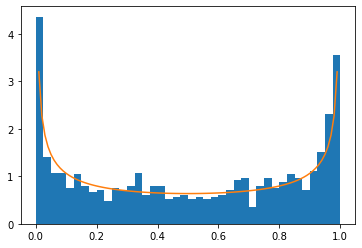

In [9]:
#Solucion Carlos ejercicio1
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def comparación_densidad(f_x, Finv, N):
    u = np.random.uniform(0,1,N)
    f_random = Finv(u)
    x = np.arange(0,1,.01)
    f_densidad = f_x(x)
    plt.hist(f_random, bins =40, density = True)
    plt.plot(x,f_densidad)
    plt.show();

f_x = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x)) # derivada de F(x) para obtener la densidad de probabilidad
Finv = lambda u: np.sin(np.pi*u/2)**2  # Genera las variables aleatorias, se obtiene despejando x de la ecuación dada
N = 1000
comparación_densidad(f_x,Finv, N)

### Respuesta planteada en el ejercicio:
Obtuvimos los resultados esperados

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$
**El Algoritmo que debemos realizar:**
   1. Generar $U$.
   2. Si $U<p_0$, poner $X=0$ y detenerse.
   3. Si $p_0<U<p_0+p_1$, poner $X=1$ y detenerse.
   $$ \vdots$$
   4. Si $p_0+\cdots+p_{n-1}<U<p_0+\cdots+p_{n}$, poner $X=n$ y detenerse.

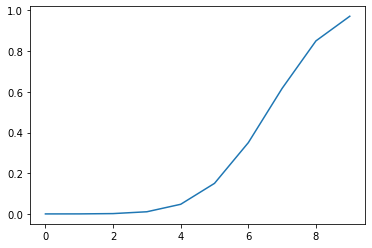

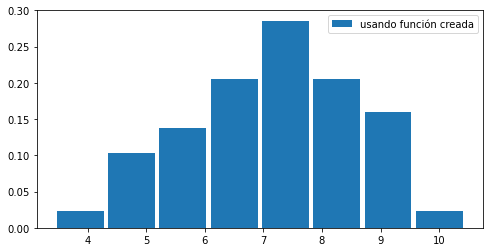

None


In [3]:
#Solucion Ricky
def Binomial(n,p):
    Proba = np.zeros(n)
    Proba[0] = (1-p)**n
    def proba(i):
        nonlocal Proba
        c  = p/(1-p)
        Proba[i+1]=(c*(n-i)/(i+1))*Proba[i]
        
    [proba(i) for i in range(n-1)]
    return np.cumsum(Proba)
x = Binomial(10,.7)
plt.plot(x)

def Distr_discreta(U:'vector de números aleatorios',
                       proba_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in proba_acum if i<U[j]),range(N))))
    return v

def histograma(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()

# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 100

proba_acum = Binomial(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
Distr_binomial = Distr_discreta(u,proba_acum)
print(histograma(Distr_binomial,'usando función creada'))

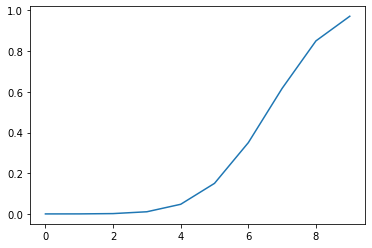

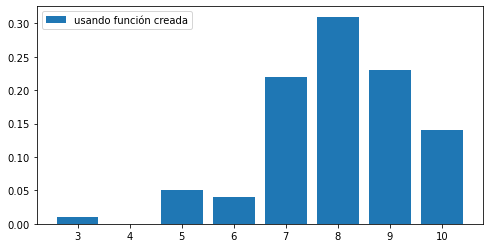

In [19]:
#Solucion Carlos
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)
x = P_acum_Binomial_o(10,.7)
plt.plot(x)

def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()

# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 100

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

### Respuesta planteada en el ejercicio:
La distribucion binomial nos dio los resultados esperados

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

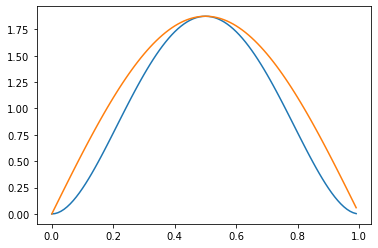

None


In [4]:
#Solucion Ricky
#ejercicio1
from scipy import optimize
from scipy.stats import beta

f = lambda x: 30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a * np.sin(np.pi*x)
N = 10000

def funcion1 (f, t, N):
    x_1 = np.arange(0,1,.01)
    f_1 = f(x_1)
    x_2 = np.arange (0,1,.01)
    f_2 = t(x_2)
    
    plt.plot(x_1,f_1, label="f(x)") #f(x)
    plt.plot(x_2, f_2, label='t(x)') #t(x)
    plt.show();

print(funcion1(f,t,N))

### Encontrar la función de densidad  𝑔(𝑥)  según lo visto en clase.

$$t(x)= asin({\pi}x)$$
$$c= \int\limits_{0}^{1}asin({\pi}x) dx $$
$$ u = {x\pi} $$
$$ c = {a\over\pi} \int\limits_{0}^{1}sin(u)du $$
$$ c = -{acos(u)\over\pi} $$
$$c = -{acos(x\pi)\over\pi}$$
$$ c = {2a\over\pi} $$

$$ g(x)= {asin({\pi}x)\over2a/\pi} $$

$$ g(x) = \frac{\pi \sin(\pi x)}{2} $$

### Usar la función encontrada y utilizar el método de la transformada inversa, para generar variables aleatorias que sigan la distribución  𝑔(𝑥)

$$G(x) = \int g(x)dx $$
$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

None


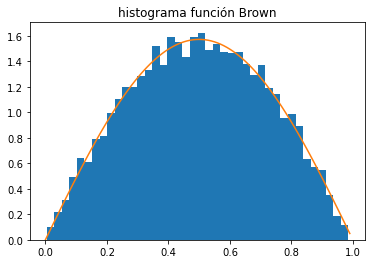

In [14]:
#ejercicio 4
N=10000
g_x = lambda x: (np.pi / 2) * np.sin(np.pi * x)
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)

print(Browniano(g_x,g_inv,N))


El máximo de f es: [1.875]


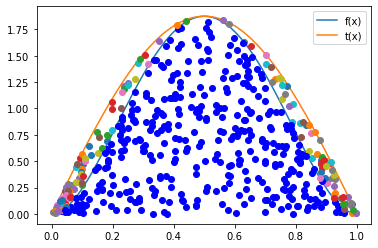

None


In [13]:

#ejercicio 5
def funcion2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]          
    plt.show()
    
x = np.arange(0,1,0.01)
print('El máximo de f es:',a)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

print(funcion2(R2,R1,f,t))

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 72.8 %
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) con pulso senoidal es de  57.199999999999996 %


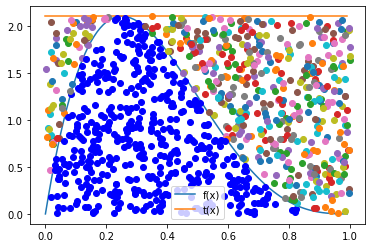

None


In [18]:
#ejercicio 6

def funcion3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(funcion3(R2,R1,f,t1))/N*100,'%')
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) con pulso senoidal es de ', sum(funcion3(R2,R1,f,t2))/N*100,'%')

#ejercicio 7

f = lambda x:20*x*(1-x)**3
f_max = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: f_max*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print(funcion2(R2,R1,f,t))

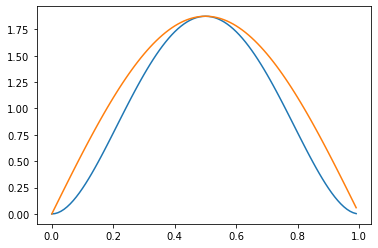

In [4]:
#Solucion Carlos ejercicio1
from scipy import optimize
from scipy.stats import beta

f = lambda x: 30*(x**2-2*x**3+x**4)
a = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: a * np.sin(np.pi*x)
N = 10**3

def ccomparacion (f, t, N):
    x_1 = np.arange(0,1,.01)
    f_1 = f(x_1)
    x_2 = np.arange (0,1,.01)
    f_2 = t(x_2)
    
    plt.plot(x_1,f_1, label="f(x)") #función f(x)
    plt.plot(x_2, f_2, label='t(x)') #función t(x)
    plt.show();

ccomparacion(f,t,N)

### Solución carlos ejercicio2

$$t(x)= asin({\pi}x)$$
$$c= \int\limits_{0}^{1}asin({\pi}x) dx $$
$$ u = {x\pi} $$
$$ c = {a\over\pi} \int\limits_{0}^{1}sin(u)du $$
$$ c = -{acos(u)\over\pi} $$
$$c = -{acos(x\pi)\over\pi}$$
$$ c = {2a\over\pi} $$

$$ g(x)= {asin({\pi}x)\over2a/\pi} $$

$$ g(x) = \frac{\pi \sin(\pi x)}{2} $$

### Solución Carlos ejercicio 3

$$G(x) = \int g(x)dx $$
$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

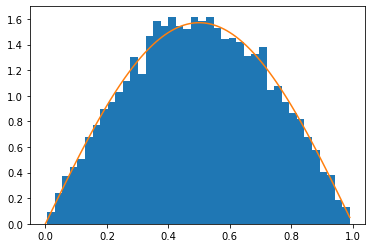

In [10]:
# solución Carlos ejercicio 4
N=10000
g_x = lambda x: (np.pi / 2) * np.sin(np.pi * x)
g_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)
comparación_densidad(g_x,g_inv,N)

El máximo de f es: [1.875]


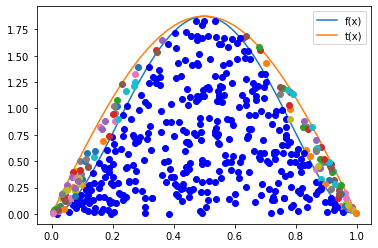

In [10]:
# Solución Carlos ejercicio 5
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]          
    plt.show()
    
x = np.arange(0,1,0.01)
print('El máximo de f es:',a)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

Acep_rechazo(R2,R1,f,t)

In [18]:
#Solución Carlos ejercicio 6

def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(Acep_rechazo2(R2,R1,f,t1))/N*100,'%')
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) con pulso senoidal es de ', sum(Acep_rechazo2(R2,R1,f,t2))/N*100,'%')

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 71.0 %
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) con pulso senoidal es de  55.00000000000001 %


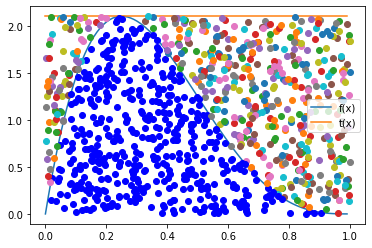

In [13]:
# Solución carlos ejercicio 7

f = lambda x:20*x*(1-x)**3
f_max = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: f_max*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

### Respuesta planteada en el ejercicio:
Obtuvimos los resultados esperados